In [1]:
import numpy as np
import matplotlib.pyplot as plt


### 10阶一阶微分算符

$$
\frac{d f}{d x}=\left[\begin{array}{ccccccc}0 & 1 & 0 & 0 & \ldots & 0 & 0 \\ -1 & 0 & 1 & 0 & \ldots & 0 & 0 \\ 0 & -1 & 0 & 1 & \ldots & 0 & 0 \\ 0 & 0 & -1 & 0 & \ldots & 0 & 0 \\ \ldots & \ldots & \ldots & \ldots & \ldots & \ldots & \ldots \\ 0 & 0 & 0 & 0 & \ldots & 0 & 1 \\ 0 & 0 & 0 & 0 & \ldots & -1 & 0\end{array}\right]\left[\begin{array}{c}f(a) \\ f(a+h) \\ f(a+2 h) \\ f(a+3 h) \\ \ldots \\ f(a+(n-2) h) \\ f(b)\end{array}\right] /(2 h)=D|f\rangle
$$

In [2]:
# 这是二阶的
N=10
dx=1
(-2 * np.diag(np.ones((N), np.float32), 0)
            + np.diag(np.ones((N-1), np.float32), 1)
            + np.diag(np.ones((N-1), np.float32), -1))/(dx**2)

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]], dtype=float32)

### 10阶段微分算符

$$
\frac{d^{2} f}{d x^{2}}=\left[\begin{array}{ccccccc}-2 & 1 & 0 & 0 & \ldots & 0 & 0 \\ 1 & -2 & 1 & 0 & \ldots & 0 & 0 \\ 0 & 1 & -2 & 1 & \ldots & 0 & 0 \\ 0 & 0 & 1 & -2 & \ldots & 0 & 0 \\ \ldots & \ldots & \ldots & \ldots & \ldots & \ldots & \ldots \\ 0 & 0 & 0 & 0 & \ldots & -2 & 1 \\ 0 & 0 & 0 & 0 & \ldots & 1 & -2\end{array}\right]\left[\begin{array}{c}f(a) \\ f(a+h) \\ f(a+2 h) \\ f(a+3 h) \\ \ldots \\ f(a+(n-2) h) \\ f(b)\end{array}\right] / h^{2}=\operatorname{Lap}|f\rangle
$$

In [3]:
N=10
dx=1
(np.diag(np.ones((N-1), np.float32), 1) - np.diag(np.ones((N-1), np.float32), -1))/(2*dx)

array([[ 0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0.5,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ]],
      dtype=float32)

In [4]:
class Schrodinger:
    def __init__(self, potential_func, 
                 mass = 1, hbar=1,
                 xmin=-5, xmax=5, ninterval=1000):
        # 离散网格数 [xmin, xmax, ninterval]
        self.x = np.linspace(xmin, xmax, ninterval)    
        # 势场算符
        self.U = np.diag(potential_func(self.x), 0)   
        # 二阶微分算符
        self.Lap = self.laplacian(ninterval)        
        # 哈密顿算符
        self.H = - hbar**2 / (2*mass) * self.Lap + self.U  
        # 能量本征值 和 本征向量即波函数（每列为一个本征波函数，每列是不同的能级）
        self.eigE, self.eigV = self.eig_solve()
            
        
    def laplacian(self, N):
        '''构造二阶微分算子：Laplacian'''
        dx = self.x[1] - self.x[0]
        '''
        np.diag()，把一个数列填到对角线上，最后一个01参数，表示对角线的位置，大于零位于对角线上面，小于零则在下面，0表示在对角线上
        '''
        '''
        【填充-2的阵（对角线0） + 填充1的矩阵（对角线+1） + 填充1的矩阵（对角线-1）】/dx**2
        '''
        return (-2 * np.diag(np.ones((N), np.float32), 0)
            + np.diag(np.ones((N-1), np.float32), 1)
            + np.diag(np.ones((N-1), np.float32), -1))/(dx**2)
    
    def eig_solve(self):
        '''解哈密顿矩阵的本征值，本征向量；并对本征向量排序'''
        
        w, v = np.linalg.eig(self.H)  # 返回输入矩阵的 特征值w 和特征向量v,特征向量就是波函数向量——Hv=Ev,E为特征值，v为特征向量
        print(w.shape)
        print(v.shape)
        idx_sorted = np.argsort(w) # 对本征值排序
        return w[idx_sorted], v[:, idx_sorted]#v表示波函数第n列表示第n个本征态，也就是n能级，这里把能级给排列了
    
    def wave_func(self, n=0):
        #特征向量的第几列就是第几能级（本征值）的波函数
        return self.eigV[:, n]

    def eigen_value(self, n=0):
        #返回第n能级的本征值
        return self.eigE[n]
    
    def check_eigen(self, n=7):
        '''检查是否 H|psi> = E |psi> '''
        with plt.style.context(['science', 'ieee', "no-latex"]):
            HPsi = np.dot(self.H, self.eigV[:, n])
            EPsi = self.eigE[n] * self.eigV[:, n]
            plt.plot(self.x, HPsi, label=r'$H|\psi_{%s} \rangle$'%n)
            plt.plot(self.x, EPsi, '-.', label=r'$E |\psi_{%s} \rangle$'%n)
            plt.legend(loc='upper center')
            plt.xlabel(r'$x$')
            plt.ylim(EPsi.min(), EPsi.max() * 1.6)
            
    def plot_density(self, n=7):
        '''绘制概率密度'''
        with plt.style.context(['science', 'ieee', "no-latex"]):
            rho = self.eigV[:, n] * self.eigV[:, n]
            plt.plot(self.x, rho)
            plt.title(r'$E_{%s}=%.2f$'%(n, self.eigE[n]))
            plt.ylabel(r'$\rho_{%s}(x)=\psi_{%s}^*(x)\psi_{%s}(x)$'%(n, n, n))
            plt.xlabel(r'$x$')
            
    def plot_potential(self):
        '''绘制势场'''
        with plt.style.context(['science', 'ieee', "no-latex"]):
            plt.plot(self.x, np.diag(self.U))
            plt.ylabel(r'potential')
            plt.xlabel(r'$x$')

In [5]:
'''
这一部分是无关整个程序的，这里只是验证了以下本征值、本征向量的用法
'''

# H = np.matrix([[1,1,1],[0,2,0],[0,0,3]])
H = [[1,1,1],[0,2,0],[0,0,3]]
w, v =np.linalg.eig(H)
display("特征值：")
display(v)
display("特征向量")
display(w)

display("矩阵*第二个本征态 = 2*第二个本征态")
print(
    np.dot(H,v[:,1]),
    '=',
    '2*',
    v[:,1]
)


'特征值：'

array([[1.        , 0.70710678, 0.4472136 ],
       [0.        , 0.70710678, 0.        ],
       [0.        , 0.        , 0.89442719]])

'特征向量'

array([1., 2., 3.])

'矩阵*第二个本征态 = 2*第二个本征态'

[1.41421356 1.41421356 0.        ] = 2* [0.70710678 0.70710678 0.        ]


In [6]:
# 定义谐振子势
def harmonic_potential(x, k=100):
    return 0.5 * k * x**2

# 创建谐振子势下的薛定谔方程
schro_harmonic = Schrodinger(harmonic_potential)

(1000,)
(1000, 1000)


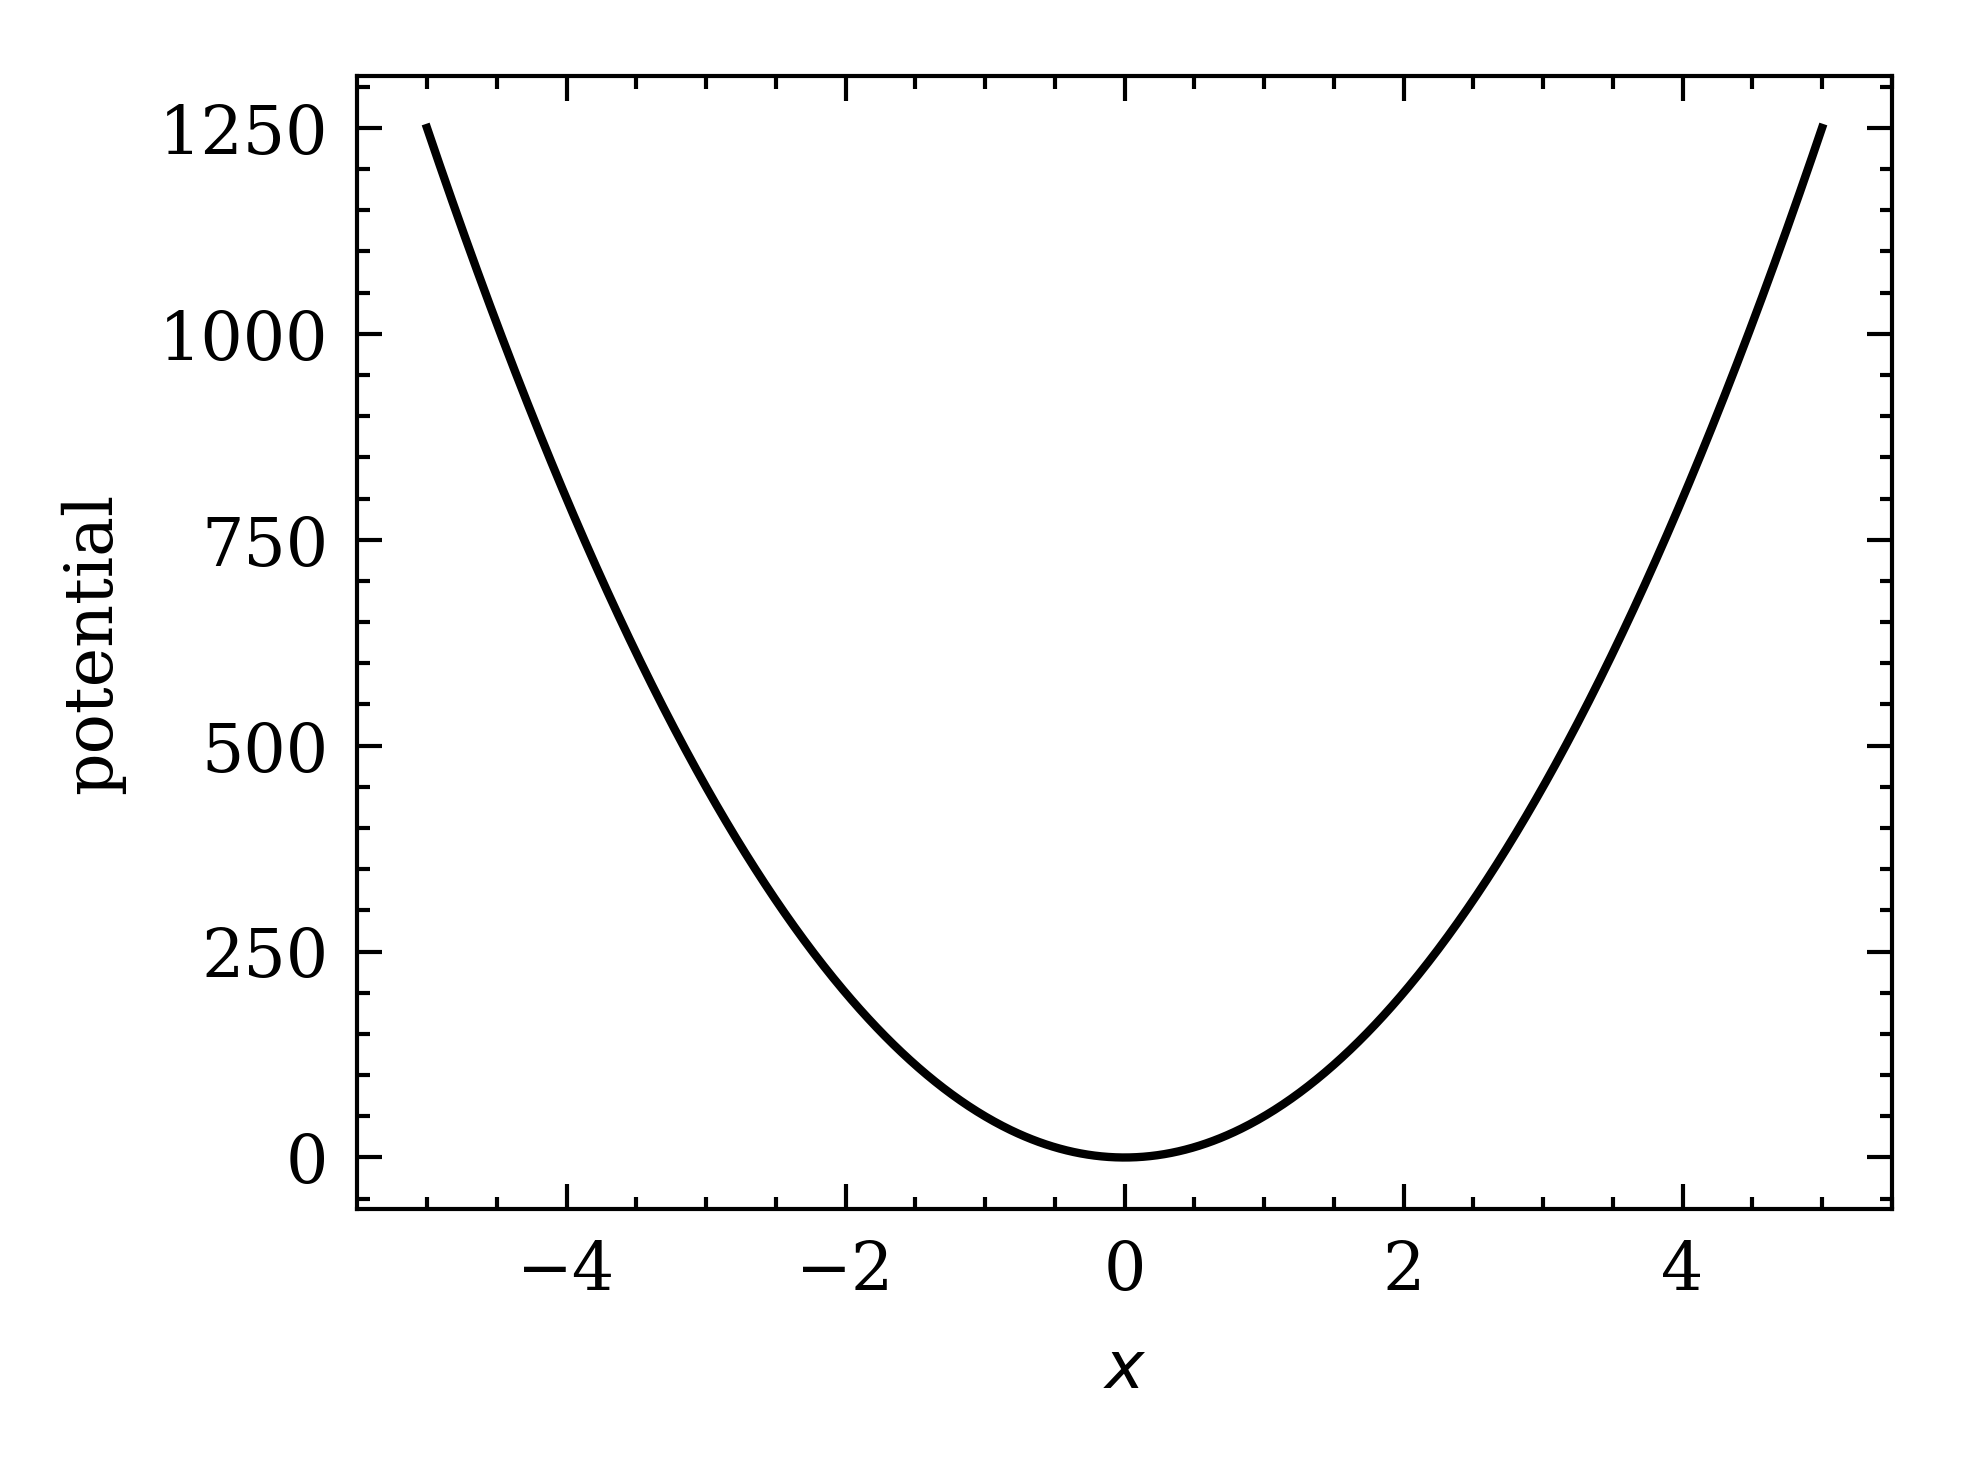

In [7]:
schro_harmonic.plot_potential()

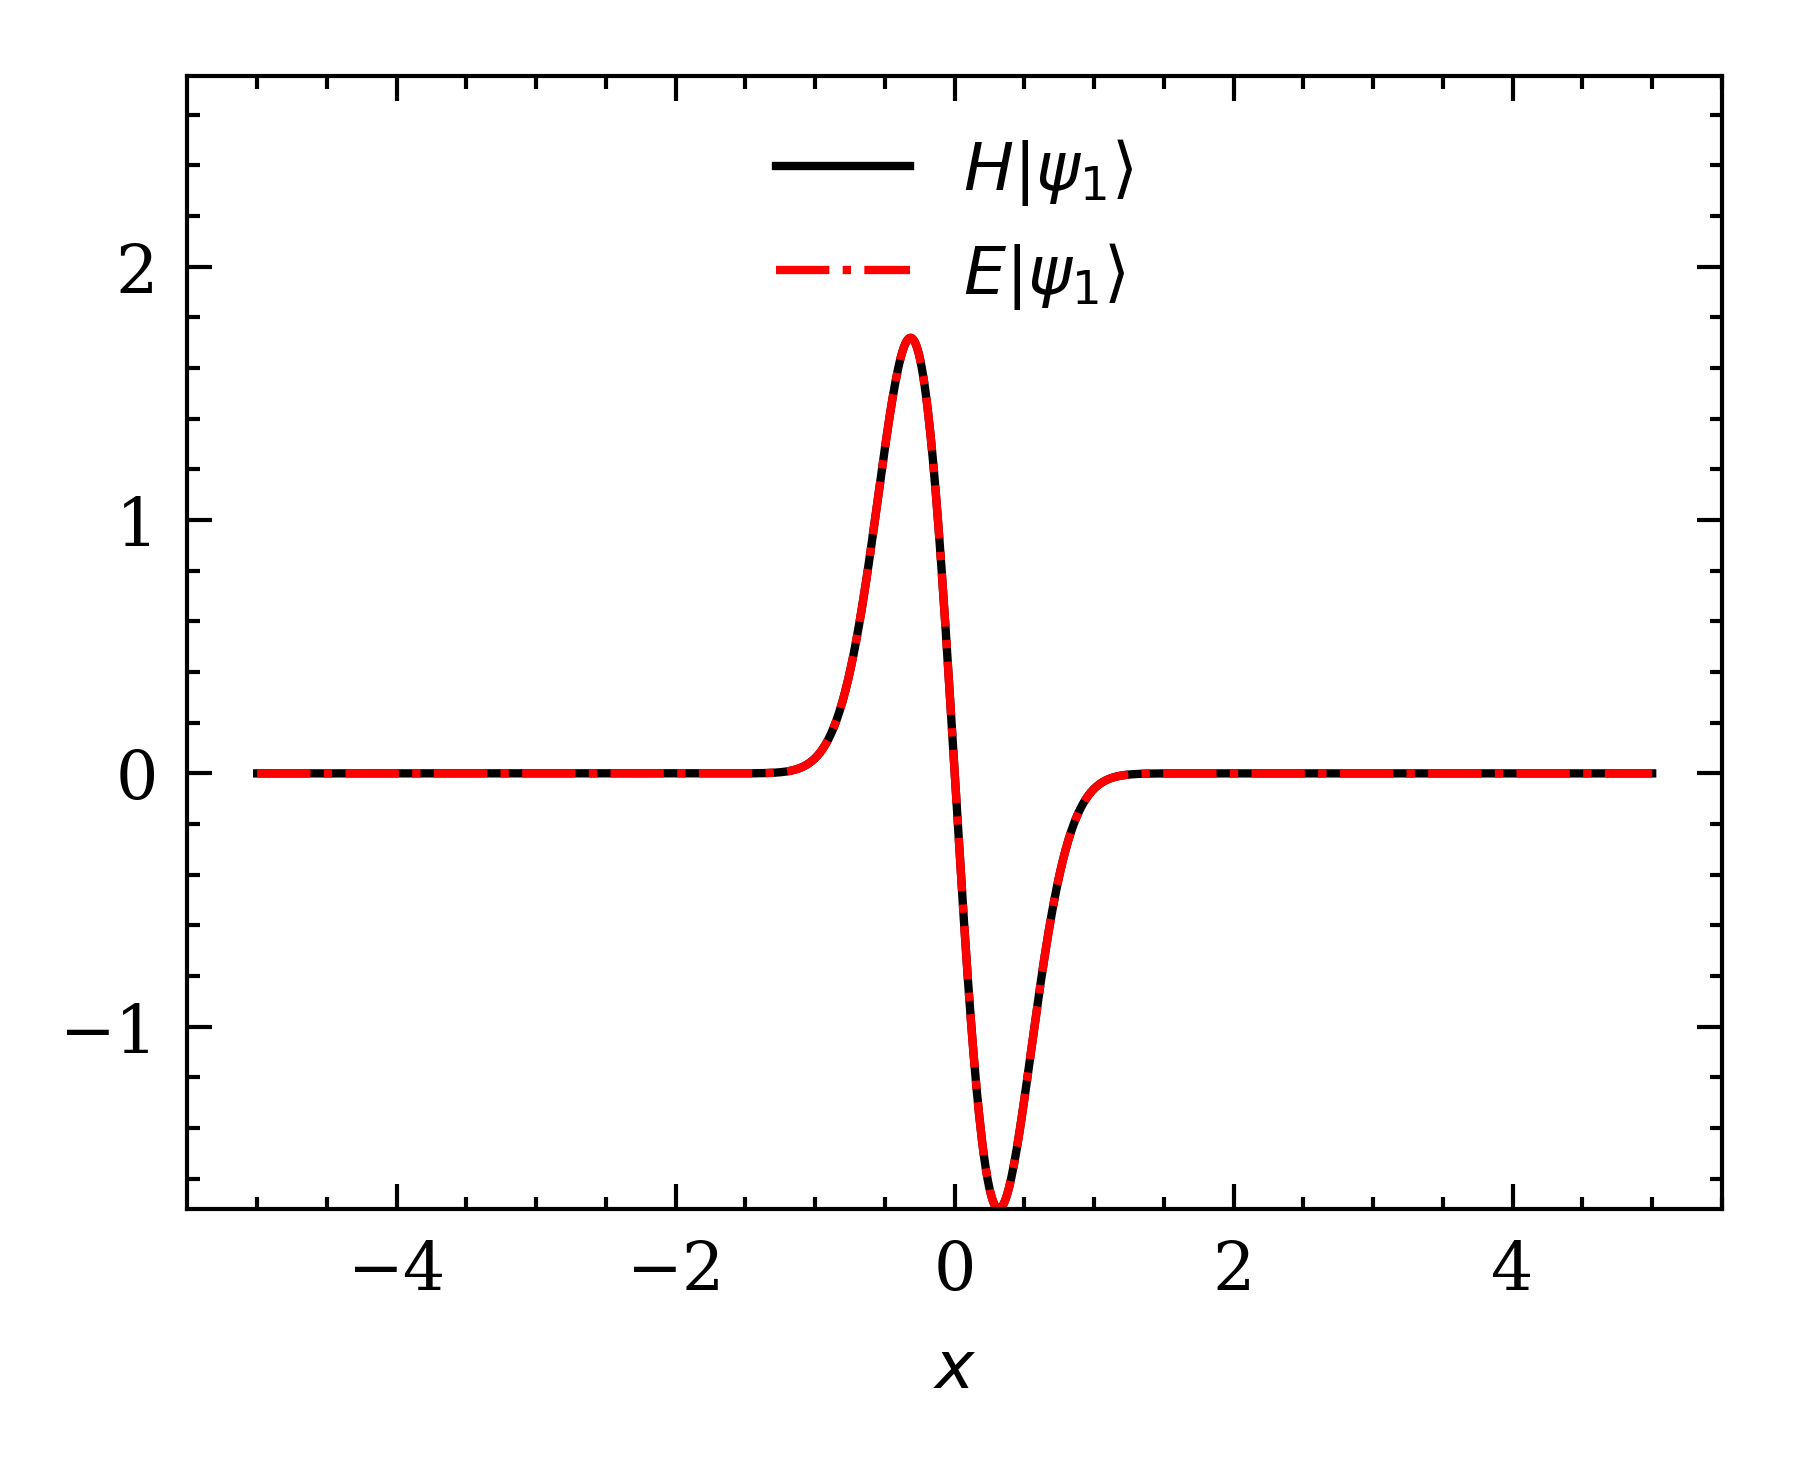

In [8]:
schro_harmonic.check_eigen(n=1)

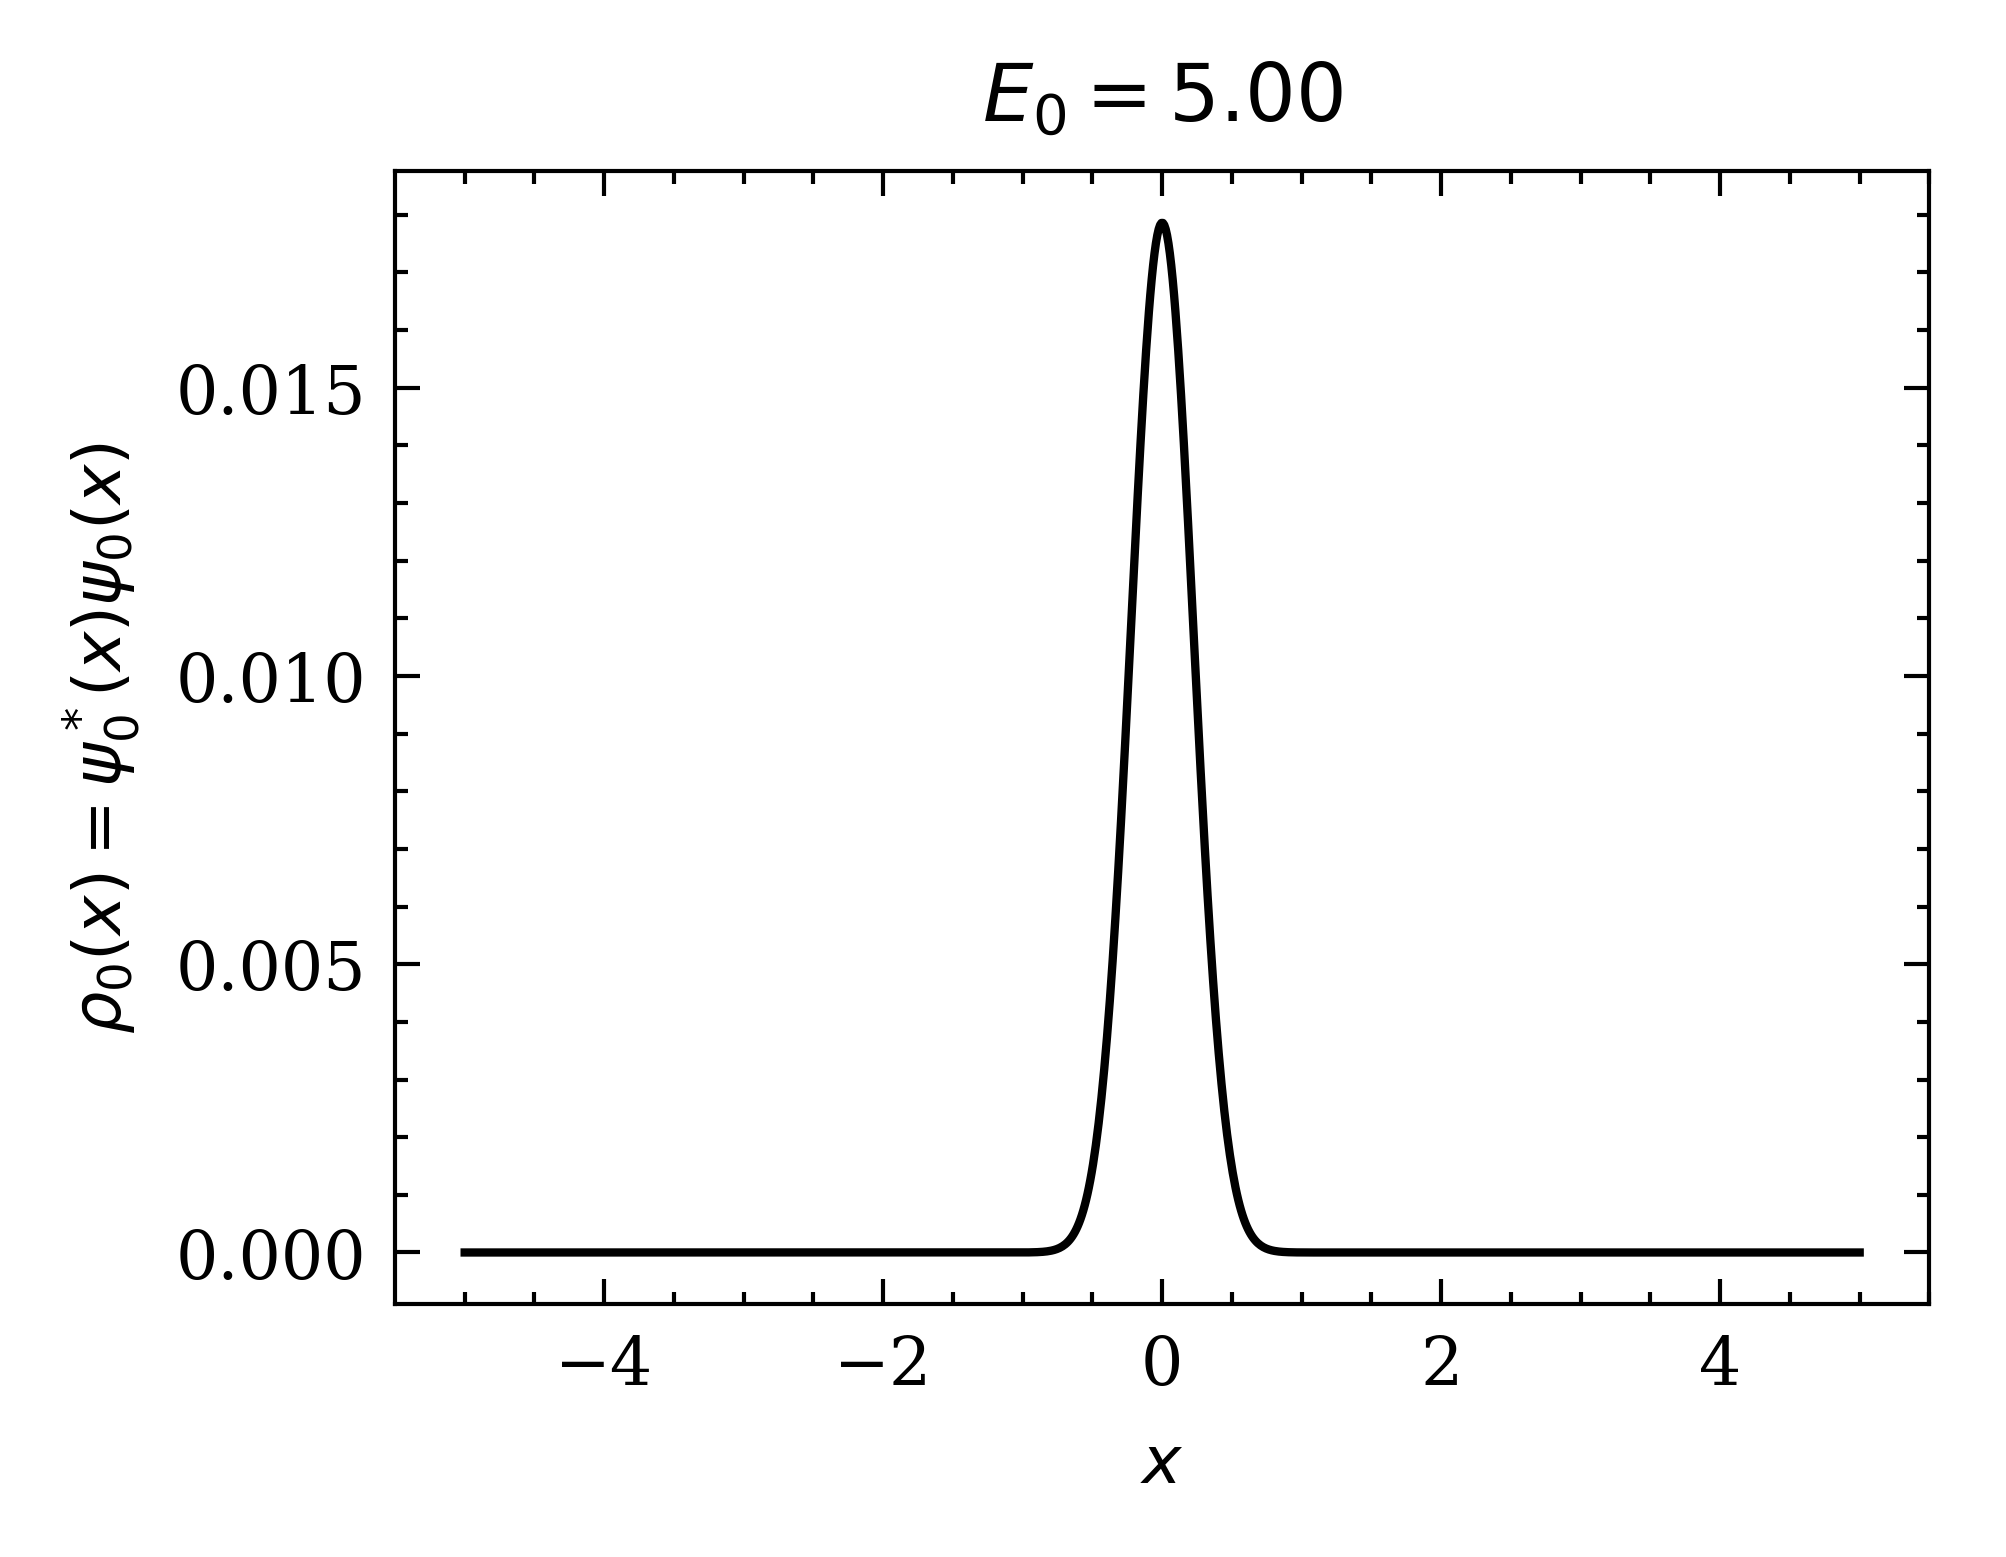

In [9]:
# n能级的概率密度
schro_harmonic.plot_density(n=0)

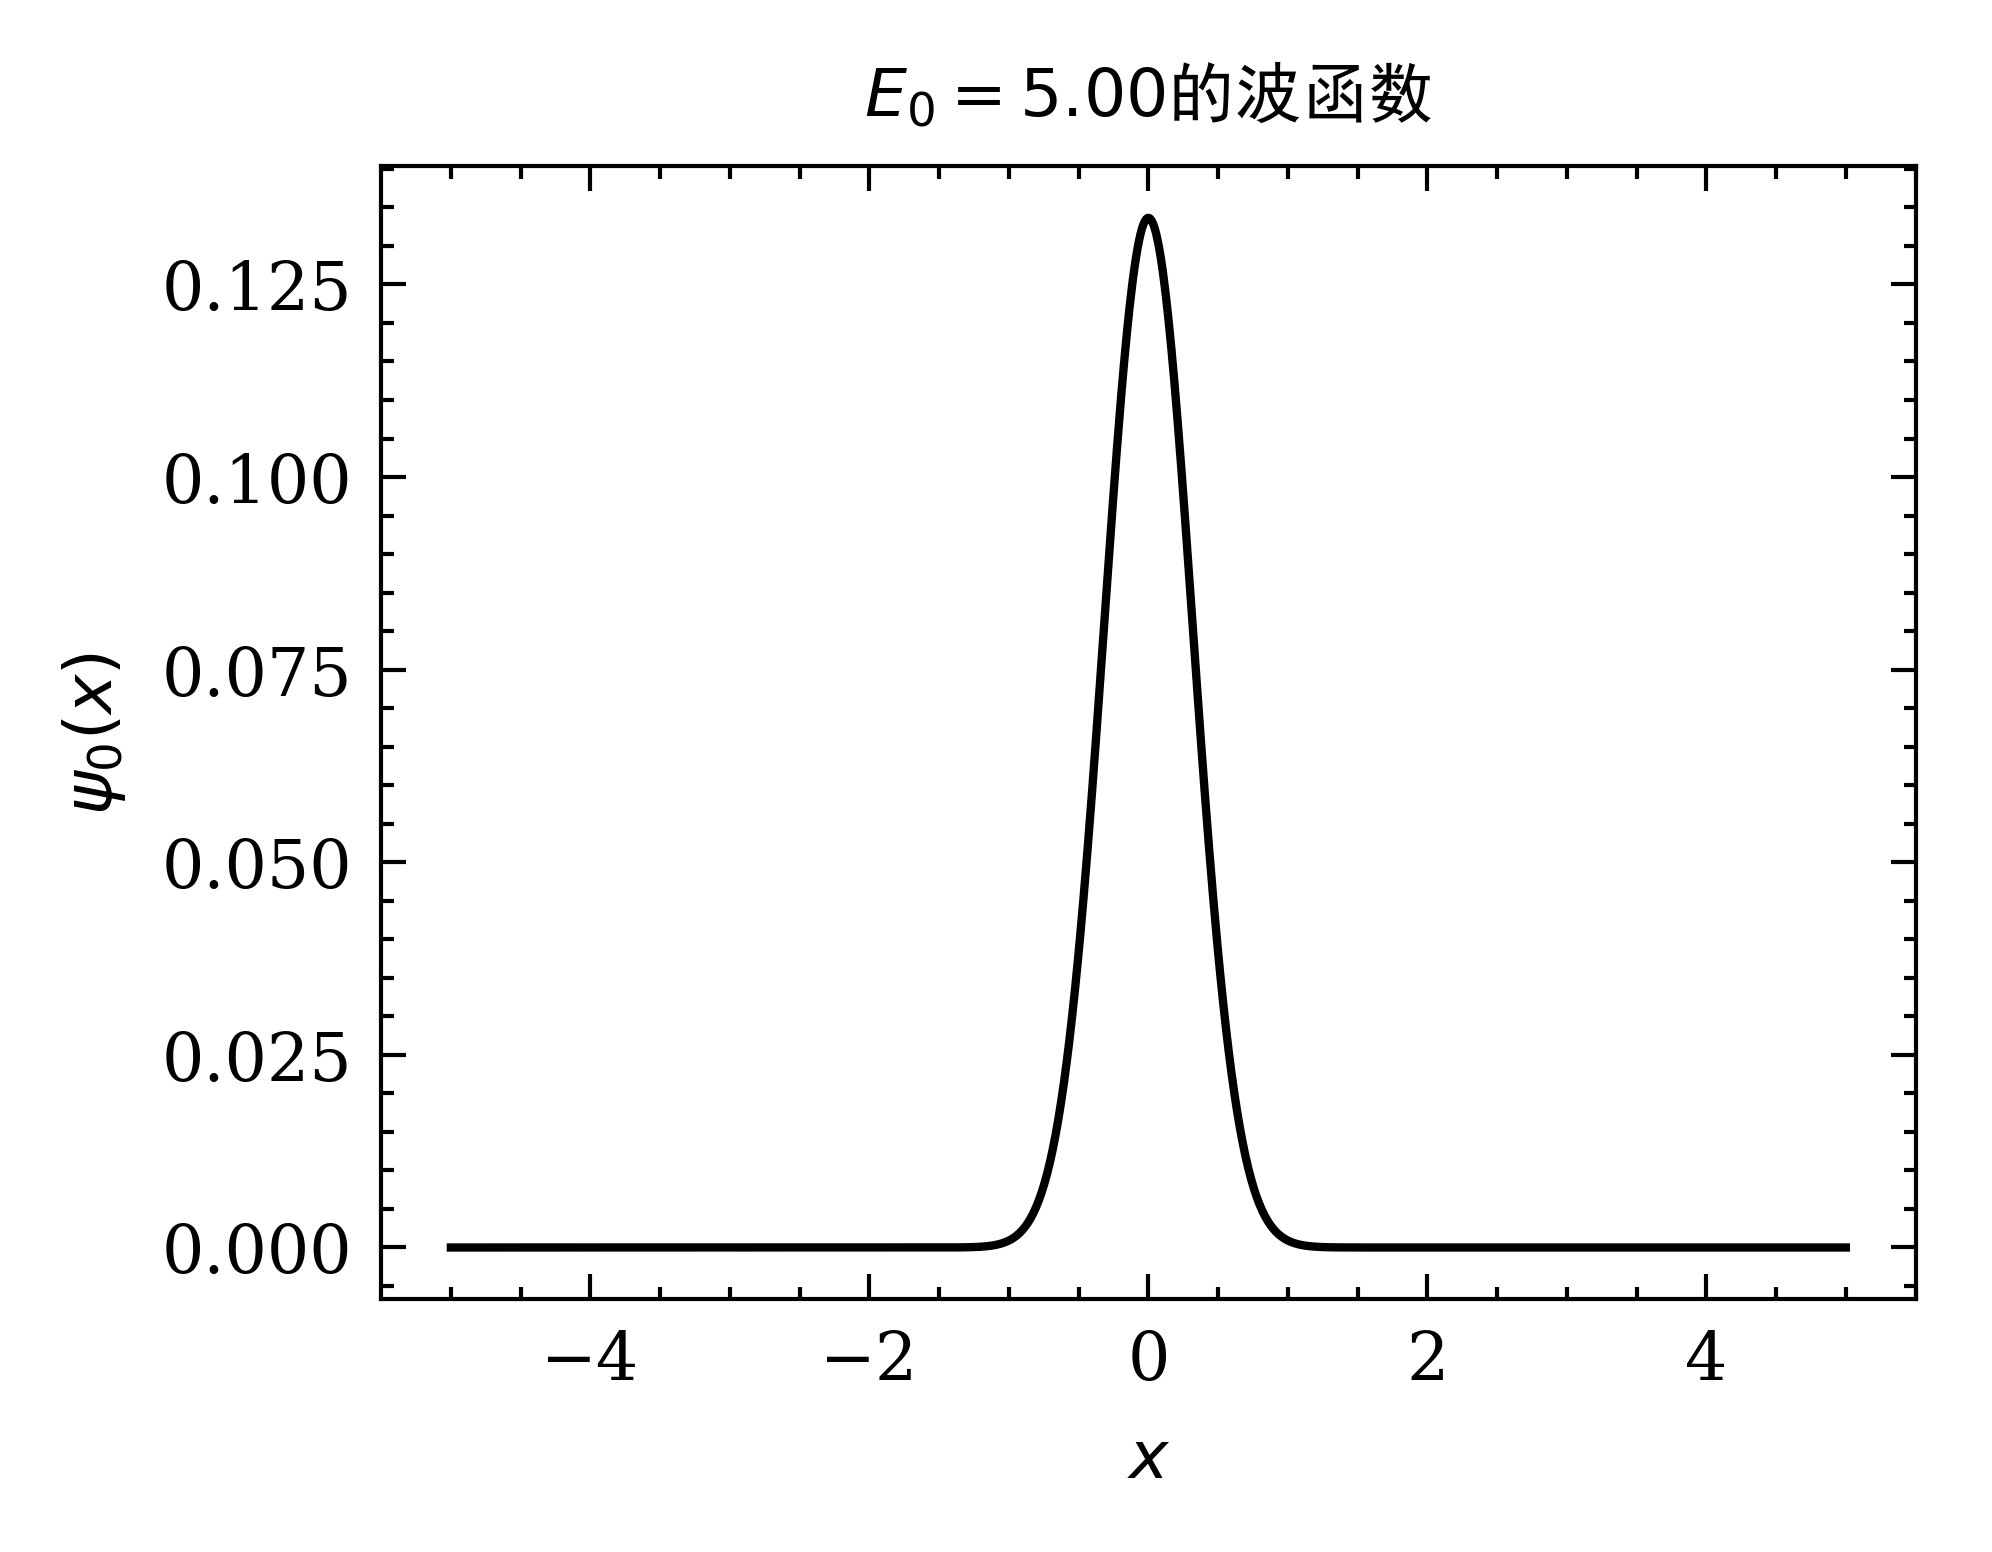

In [14]:
n = 0
with plt.style.context(['science', 'ieee', "no-latex"]):
    rho = schro_harmonic.eigV[:, n]
    plt.plot(schro_harmonic.x, rho)
    plt.title(r'$E_{%s}=%.2f$的波函数'%(n, schro_harmonic.eigE[n]), fontproperties="SimHei")
    plt.ylabel(r'$\psi_{%s}(x)$'%(n))
    plt.xlabel(r'$x$')